<a href="https://colab.research.google.com/github/pdrobny/MonReader/blob/main/P4_text_extract_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install easyocr
!pip install pytesseract
!pip install paddleocr
!pip install paddlepaddle -f https://www.paddlepaddle.org.cn/whl/linux/cpu.html

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/cpu.html


In [78]:
from google.colab import userdata
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pytesseract
import easyocr
from paddleocr import PaddleOCR
from sentence_transformers import SentenceTransformer, util

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load files from google drive

from google.colab import drive
drive.mount('/content/drive')

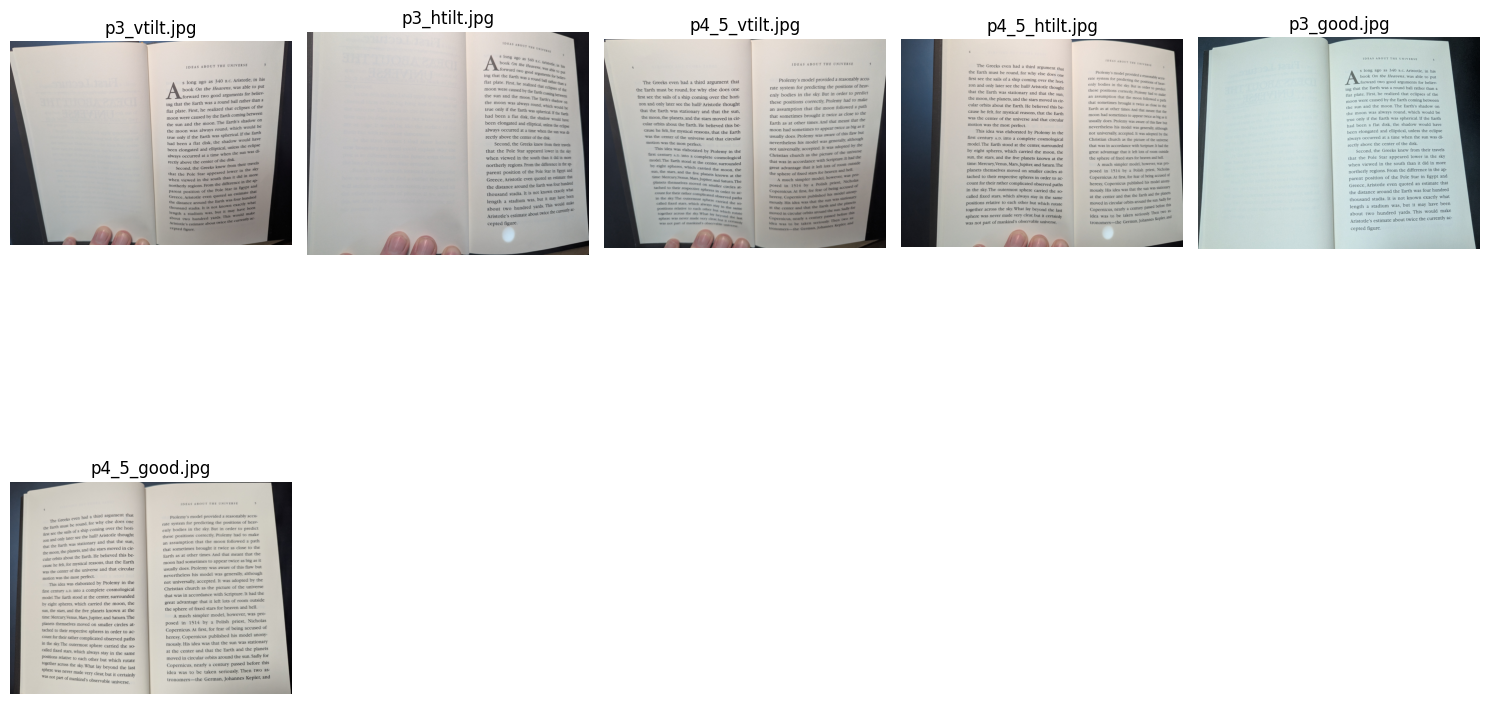

In [24]:
image_dir = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books'
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg'))]

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(image_files):
  if i < 10: # Limit the number of images shown
    img = plt.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
  else:
    break
plt.tight_layout()
plt.show()


In [25]:
image_files

['/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_vtilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_htilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_vtilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_htilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_good.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_good.jpg']

In [26]:
p3_good = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_good.jpg'
p4_5_good = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_good.jpg'
p3_vtilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_vtilt.jpg'
p3_htilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_htilt.jpg'
p4_5_vtilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_vtilt.jpg'
p4_5_htilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_htilt.jpg'


In [27]:
p3_actual = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_actual.txt'
p4_5_actual = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_actual.txt'

In [ ]:
# Load the Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

## Pytesseract

In [45]:
p3_good_tes = pytesseract.image_to_string(p3_good, lang='eng')
p3_vtilt_tes = pytesseract.image_to_string(p3_vtilt, lang='eng')
p3_htilt_tes = pytesseract.image_to_string(p3_htilt, lang='eng')
p4_5_good_tes = pytesseract.image_to_string(p4_5_good, lang='eng')
p4_5_vtilt_tes = pytesseract.image_to_string(p4_5_vtilt, lang='eng')
p4_5_htilt_tes = pytesseract.image_to_string(p4_5_htilt, lang='eng')


In [57]:
sim_p3good = util.cos_sim(model.encode(p3_good_tes), model.encode(open(p3_actual, 'r').read()))
sim_p3vtilt = util.cos_sim(model.encode(p3_vtilt_tes), model.encode(open(p3_actual, 'r').read()))
sim_p3htilt = util.cos_sim(model.encode(p3_htilt_tes), model.encode(open(p3_actual, 'r').read()))
sim_p4_5good = util.cos_sim(model.encode(p4_5_good_tes), model.encode(open(p4_5_actual, 'r').read()))
sim_p4_5vtilt = util.cos_sim(model.encode(p4_5_vtilt_tes), model.encode(open(p4_5_actual, 'r').read()))
sim_p4_5htilt = util.cos_sim(model.encode(p4_5_htilt_tes), model.encode(open(p4_5_actual, 'r').read()))



In [58]:
print(f"Consine similarity p3_good: {sim_p3good.item()}")
print(f"Consine similarity p3_vtilt: {sim_p3vtilt.item()}")
print(f"Consine similarity p3_htilt: {sim_p3htilt.item()}")
print(f"Consine similarity p4_5_good: {sim_p4_5good.item()}")
print(f"Consine similarity p4_5_vtilt: {sim_p4_5vtilt.item()}")
print(f"Consine similarity p4_5_htilt: {sim_p4_5htilt.item()}")

Consine similarity p3_good: 0.9419071674346924
Consine similarity p3_vtilt: 0.8190586566925049
Consine similarity p3_htilt: 0.797454833984375
Consine similarity p4_5_good: 0.9006960391998291
Consine similarity p4_5_vtilt: 0.8485134840011597
Consine similarity p4_5_htilt: 0.9693607091903687


In [60]:
print(p3_good_tes)

IDEAS ABOUT THE UNIVERSE

paemens

att

s long ago as 340 B.c. Aristotle, in his

book On the Heavens, was able to put

forward two good arguments for believ-
ing that the Earth was a round ball rather than a
flat plate. First, he realized that eclipses of the
| moon were caused by the Earth coming between
; the sun and the moon. The Earth's shadow on
the moon was always round, which would be
true only if the Earth was spherical. If the Earth
had been a flat disk, the shadow would have
been elongated and elliptical, unless the eclipse

always occurred at a time when the sun was di-

 

rectly above the center of the disk.

Second, the Greeks knew from their travels
that the Pole Star appeared lower in the sky
when viewed in the south than it did in more
northerly regions. From the difference in the ap-
parent position of the Pole Star in Egypt and

es

Greece, Aristotle even quoted an estimate that

the distance around the Earth was four hundred

 

thousand stadia. It is not known exa

In [59]:
print(p3_htilt_tes)

  
  
 
 
 
 
 
 
   
  
  

been elongated and elliptical, unless the eclipse
always occurred at a time when the sun was di
rectly above the center of the disk.

Second, the Greeks knew from their travels
that the Pole Star appeared lower in the sky
when viewed in the south than it did in more
northerly regions. From the difference in the ap-
parent position of the Pole Star in Egypt and
Greece, Aristotle even quoted an estimate that
the distance around the Earth was four hundred
thousand stadia. It is not knowa exactly what

cepted figure.



## easyocer

In [61]:
reader = easyocr.Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
result = reader.readtext(image_files[0])
for (bbox, page3, prob) in result:
  print(page3)

In [66]:
p3_good_easy = reader.readtext(p3_good)
p3_good_easytxt = ' '.join([text for (_, text, _) in p3_good_easy])
p3_vtilt_easy = reader.readtext(p3_vtilt)
p3_vtilt_easytxt = ' '.join([text for (_, text, _) in p3_vtilt_easy])
p3_htilt_easy = reader.readtext(p3_htilt)
p3_htilt_easytxt = ' '.join([text for (_, text, _) in p3_htilt_easy])
p4_5_good_easy = reader.readtext(p4_5_good)
p4_5_good_easytxt = ' '.join([text for (_, text, _) in p4_5_good_easy])
p4_5_vtilt_easy = reader.readtext(p4_5_vtilt)
p4_5_vtilt_easytxt = ' '.join([text for (_, text, _) in p4_5_vtilt_easy])
p4_5_htilt_easy = reader.readtext(p4_5_htilt)
p4_5_htilt_easytxt = ' '.join([text for (_, text, _) in p4_5_htilt_easy])

In [68]:
sim_p3_good = util.cos_sim(model.encode(p3_good_easytxt), model.encode(open(p3_actual, 'r').read()))
sim_p3vtilt = util.cos_sim(model.encode(p3_vtilt_easytxt), model.encode(open(p3_actual, 'r').read()))
sim_p3htilt = util.cos_sim(model.encode(p3_htilt_easytxt), model.encode(open(p3_actual, 'r').read()))
sim_p4_5good = util.cos_sim(model.encode(p4_5_good_easytxt), model.encode(open(p4_5_actual, 'r').read()))
sim_p4_5vtilt = util.cos_sim(model.encode(p4_5_vtilt_easytxt), model.encode(open(p4_5_actual, 'r').read()))
sim_p4_5htilt = util.cos_sim(model.encode(p4_5_htilt_easytxt), model.encode(open(p4_5_actual, 'r').read()))


In [70]:
print(f"Consine similarity p3_good: {sim_p3good.item()}")
print(f"Consine similarity p3_vtilt: {sim_p3vtilt.item()}")
print(f"Consine similarity p3_htilt: {sim_p3htilt.item()}")
print(f"Consine similarity p4_5_good: {sim_p4_5good.item()}")
print(f"Consine similarity p4_5_vtilt: {sim_p4_5vtilt.item()}")
print(f"Consine similarity p4_5_htilt: {sim_p4_5htilt.item()}")

Consine similarity p3_good: 0.9419071674346924
Consine similarity p3_vtilt: 0.8190586566925049
Consine similarity p3_htilt: 0.797454833984375
Consine similarity p4_5_good: 0.9006960391998291
Consine similarity p4_5_vtilt: 0.8485134840011597
Consine similarity p4_5_htilt: 0.9693607091903687


In [71]:
p4_5_good_easytxt

"ID EA $ A B 0 UT THE UNIV ER S E 5 4 third argumnent that Ptolemy'$ model provided a reasonably accu- The Greeks for why else does one for predicting the positions of heav- must be round, rate the ship coming over the hori- enly bodies in the But in order to predict the sails of a ficst the hull? Aristotle thought these positions correctly; Ptolemy had to make only later stationary and that the sun, an assumption that the moon followed a that the Earth was the the stars moved in cir- that sometimes brought it twice as close to the moon; the He believed this be- Earth as at other times And that meant that the cular orbits about the Earth: reasons, that the Earth moon had sometimes to appear twice as as it cause he felt; forf and that circular usually does Ptolemy was aware of this flaw but WaS the center of the universe nevertheless his model was generally; although motion was the most elaborated by Ptolemy in the not universally, accepted: It was adopted by the This idea was cosmologi

In [72]:
p4_5_htilt_easytxt

"ID EAS ABOUT The Greeks even had a third argument the Earth must be round, for why else does Ptolemy's model provided a first see the sails of a ship coming over the rate system for predicting the zon and only later see the hull? Aristotle enly bodies in sky But € positions of hear: thought order to predict that the Earth was stationary and that the these positions correctly; bad to sun; make the moon, the planets,and the stars moved in cir- an assumption that the moon followed a path cular orbits about the Earth: He believed that sometimes brought it twice aS to the this be- Earth as at other times  And that cause he felt; for mystical reasons, that the Earth meant that the moon had sometimes to appear twice as big a5 it was the center of the universe and that circular usually does. Ptolemy was aware of this flaw but motion was the most perfect: nevertheless his model was generally; although This idea was elaborated by Ptolemy in the not universally; accepted: It was adopted by the f

## paddleocr

In [ ]:
ocr = PaddleOCR(lang='en')

In [108]:
p3_good_pad = ocr.ocr(p3_good)
p3_vtilt_pad = ocr.ocr(p3_vtilt)
p3_htilt_pad = ocr.ocr(p3_htilt)
p4_5_good_pad = ocr.ocr(p4_5_good)
p4_5_vtilt_pad = ocr.ocr(p4_5_vtilt)
p4_5_htilt_pad = ocr.ocr(p4_5_htilt)

Resized image size (3072x4080) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (2954x4080) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (3072x4080) exceeds max_side_limit of 4000. Resizing to fit within limit.


In [109]:
p3_good_pad

[{'input_path': '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_good.jpg',
  'page_index': None,
  'doc_preprocessor_res': {'input_path': None,
   'page_index': None,
   'input_img': array([[[52, ..., 29],
           ...,
           [20, ..., 13]],
   
          ...,
   
          [[90, ..., 75],
           ...,
           [30, ..., 17]]], dtype=uint8),
   'model_settings': {'use_doc_orientation_classify': True,
    'use_doc_unwarping': True},
   'angle': 0,
   'rot_img': array([[[52, ..., 29],
           ...,
           [20, ..., 13]],
   
          ...,
   
          [[90, ..., 75],
           ...,
           [30, ..., 17]]], dtype=uint8),
   'output_img': array([[[193, ..., 180],
           ...,
           [195, ..., 185]],
   
          ...,
   
          [[200, ..., 190],
           ...,
           [192, ..., 177]]], dtype=uint8)},
  'dt_polys': [array([[2333, 1018],
          ...,
          [2333, 1098]], dtype=int16),
   array([[2337, 1119],
          ...,
    

In [110]:
p4_5_good_pad

[{'input_path': '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_good.jpg',
  'page_index': None,
  'doc_preprocessor_res': {'input_path': None,
   'page_index': None,
   'input_img': array([[[46, ..., 33],
           ...,
           [13, ...,  9]],
   
          ...,
   
          [[26, ..., 21],
           ...,
           [ 2, ...,  0]]], dtype=uint8),
   'model_settings': {'use_doc_orientation_classify': True,
    'use_doc_unwarping': True},
   'angle': 0,
   'rot_img': array([[[46, ..., 33],
           ...,
           [13, ...,  9]],
   
          ...,
   
          [[26, ..., 21],
           ...,
           [ 2, ...,  0]]], dtype=uint8),
   'output_img': array([[[ 88, ...,  76],
           ...,
           [192, ..., 204]],
   
          ...,
   
          [[194, ..., 209],
           ...,
           [160, ..., 168]]], dtype=uint8)},
  'dt_polys': [array([[2656,  305],
          ...,
          [2656,  354]], dtype=int16),
   array([[3805,  298],
          ...,
  

In [111]:
p3_good_padtxt = ' '.join(p3_good_pad[0]['rec_texts'])
p3_vtilt_padtxt = ' '.join(p3_vtilt_pad[0]['rec_texts'])
p3_htilt_padtxt = ' '.join(p3_htilt_pad[0]['rec_texts'])
p4_5_good_padtxt = ' '.join(p4_5_good_pad[0]['rec_texts'])
p4_5_vtilt_padtxt = ' '.join(p4_5_vtilt_pad[0]['rec_texts'])
p4_5_htilt_padtxt = ' '.join(p4_5_htilt_pad[0]['rec_texts'])

In [115]:
sim_p3_good = util.cos_sim(model.encode(p3_good_padtxt), model.encode(open(p3_actual, 'r').read()))
sim_p3vtilt = util.cos_sim(model.encode(p3_vtilt_padtxt), model.encode(open(p3_actual, 'r').read()))
sim_p3htilt = util.cos_sim(model.encode(p3_htilt_padtxt), model.encode(open(p3_actual, 'r').read()))
sim_p4_5good = util.cos_sim(model.encode(p4_5_good_padtxt), model.encode(open(p4_5_actual, 'r').read()))
sim_p4_5vtilt = util.cos_sim(model.encode(p4_5_vtilt_padtxt), model.encode(open(p4_5_actual, 'r').read()))
sim_p4_5htilt = util.cos_sim(model.encode(p4_5_htilt_padtxt), model.encode(open(p4_5_actual, 'r').read()))

In [116]:
print(f"Consine similarity p3_good: {sim_p3good.item()}")
print(f"Consine similarity p3_vtilt: {sim_p3vtilt.item()}")
print(f"Consine similarity p3_htilt: {sim_p3htilt.item()}")
print(f"Consine similarity p4_5_good: {sim_p4_5good.item()}")
print(f"Consine similarity p4_5_vtilt: {sim_p4_5vtilt.item()}")
print(f"Consine similarity p4_5_htilt: {sim_p4_5htilt.item()}")

Consine similarity p3_good: 0.9419071674346924
Consine similarity p3_vtilt: 0.9318360090255737
Consine similarity p3_htilt: 0.9229753017425537
Consine similarity p4_5_good: 0.7975339889526367
Consine similarity p4_5_vtilt: 0.7779834270477295
Consine similarity p4_5_htilt: 0.7928227186203003


In [118]:
p3_good_padtxt

"the sun and the moon.The Earth's shadow on the moon was always round, which would be true only if the Earth was spherical. If the Earth had been a flat disk, the shadow would have been elongated and elliptical, unless the eclipse always occurred at a time when the sun was di- rectly above the center of the disk. Second, the Greeks knew from their travels that the Pole Star appeared lower in the sky when viewed in the south than it did in more northerlyregions.Fromthe diference in theap parent position of the Pole Star in Egypt and Greece,Aristotle even quoted an estimate that the distance around the Earth was four hundred - thousand stadia.It is not known exactly what length a stadium was, but it may have been about two hundred yards. This would make Aristotle's estimate about twice the currently ac- cepted figure."

In [119]:
p3_htilt_padtxt

"IDEAS ABOUT THE UNIVERSE 3 ILIHE s long ago as 340 B.c.Aristotle,in his 2A8O book On tbe Heavens,was able to put ENMIAE83E forward two good arguments for believ- ing that the Earth was a round ball rather thana flat plate.First,he realized that eclipses of the moon were caused by the Earth coming between the sun and the moon. The Earth's shadow on the moon was always round, which would be true only if the Earth was spherical.If the Earth had been a flat disk,the shadow would have been elongated and elliptical,unless the eclipse always occurred at a time when the sun was di- rectly above the center of the disk. Second,the Greeks knew from their travels that the Pole Star appeared lower in the sky when viewed in the south than it did in more northerly regions.From the difference in the ap- parent position of the Pole Star in Egypt and Greece,Aristotle even quoted an estimate that the distance around the Earth was four hundred thousand stadia. It is not known exactly what length a stadiu

In [120]:
p4_5_good_padtxt

"IDEAS ABOUT THE UNIVERSE 5 The Greeks even had a third argument that Ptolemy's model provided a reasonably accu- the Earth must be round, for why else does one rate system for predicting the positions of heav- first see the sails of a ship coming over the hori- enly bodies in the sky. But in order to predict zon and only later see the hull? Aristotle thought these positions correctly, Ptolemy had to make that the Earth was stationary and that the sun, an assumption that the moon followed a path the moon, the planets, and the stars moved in cir- that sometimes brought it twice as close to the cular orbits about the Earth. He believed this be- Earth as at other times. And that meant that the cause he felt, for mystical reasons,that the Earth moon had sometimes to appear twice as big as it was the center of the universe and that circular usually does.Ptolemy was aware of this flaw but motion was the most perfect. nevertheless his model was generally, although This idea was elaborated by 

In [121]:
p4_5_htilt_padtxt

"4 IDEAS ABOUT THE UNIVERSE 5 The Greeks even had a third argument that the Earth must be round,for why else does one Ptolemy's model provided a reasonably accu- first see the sails of a ship coming over the hori- rate system for predicting the positions of heay- enly bodies in the sky. But in order to predict zon and only later see the hull? Aristotle thought these positions correctly, Ptolemy had to make that the Earth was stationary and that the sun, an assumption that the moon followed a path the moon,the planets, and the stars moved in cir- that sometimes brought it twice as close to the cular orbits about the Earth. He believed this be- Earth as at other times.And that meant that the cause he felt,for mystical reasons,that the Earth moon had sometimes to appear twice as big as it was the center of the universe and that circular usually does. Ptolemy was aware of this law but motion was the most perfect. nevertheless his model was generally, although This idea was elaborated by Pt